In [16]:
import pandas as pd
import numpy as np
from sklearn import tree
import numpy as np
from sklearn.metrics import roc_auc_score

%matplotlib inline

I'll be demonstrating just the classification problems , you can build regression following a very similar process

In [17]:
# data prep from previous module
# file=r'/Users/lalitsachan/Dropbox/0.0 Data/census_income.csv'
file = 'census_income.csv'
ci_train=pd.read_csv(file)

# if you have a test data, you can combine as shown in the earlier modules

In [18]:
ci_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
pd.crosstab(ci_train['education'],ci_train['education.num'])

education.num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


#### Education.num and education are similar columns. education.num has numerical values. Hence we can drop education.

In [20]:
ci_train.drop(['education'],axis=1,inplace=True)

In [21]:
ci_train['Y'].value_counts().index

Index([' <=50K', ' >50K'], dtype='object')

In [22]:
#COnverting based on condition
ci_train['Y']=(ci_train['Y']==' >50K').astype(int)

In [23]:
#Selecting categorical columns
cat_cols=ci_train.select_dtypes(['object']).columns

In [24]:
cat_cols

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country'],
      dtype='object')

In [6]:
col= 'workclass'
freqs=ci_train[col].value_counts()

In [7]:
freqs

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
k=freqs.index[freqs>500][:-1]


In [13]:
k

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc'],
      dtype='object')

In [14]:
for cat in k:
    name=col+'_'+cat
    ci_train[name]=(ci_train[col]==cat).astype(int)


In [25]:
# Creating dummies for the columns considering cases only where value_count >500. All others are ignored.
for col in cat_cols:
    freqs=ci_train[col].value_counts()
    k=freqs.index[freqs>500][:-1]
    for cat in k:
        name=col+'_'+cat
        ci_train[name]=(ci_train[col]==cat).astype(int)
    del ci_train[col]
    print(col)

workclass
marital.status
occupation
relationship
race
sex
native.country


In [26]:
ci_train.shape

(32561, 39)

In [27]:
ci_train.isnull().sum()

age                                   0
fnlwgt                                0
education.num                         0
capital.gain                          0
capital.loss                          0
hours.per.week                        0
Y                                     0
workclass_ Private                    0
workclass_ Self-emp-not-inc           0
workclass_ Local-gov                  0
workclass_ ?                          0
workclass_ State-gov                  0
workclass_ Self-emp-inc               0
marital.status_ Married-civ-spouse    0
marital.status_ Never-married         0
marital.status_ Divorced              0
marital.status_ Separated             0
occupation_ Prof-specialty            0
occupation_ Craft-repair              0
occupation_ Exec-managerial           0
occupation_ Adm-clerical              0
occupation_ Sales                     0
occupation_ Other-service             0
occupation_ Machine-op-inspct         0
occupation_ ?                         0


In [28]:
# ci_train.drop(['Y'],1, inplace=True)

In [29]:
x_train=ci_train.drop(['Y'],1)
y_train=ci_train['Y']

## Hyper Parameters For Decision Trees

* criterion : there are two options available , "entropy" and "gini". These are the homogeneity measures that we discussed. By default "gini" is used 

* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Ignored if ``max_leaf_nodes`` is not None. We'll finding optimal value for max_leaf_nodes [which is basically size of the tree] through cross validation.

* min_sample_split : The minimum number of samples required to split an internal node. defaults to too, good idea is to keep it slightly higher in order to reduce overfitting of the data. recommended values is between 5 to 10

* min_sample_leaf : The minimum number of samples required to be at a leaf node. This defaults to 1. If this number is higher and a split results in a leaf node having lesser number of samples than specified then that split is cancelled.

* max_leaf_node : Total number of terminal nodes (leaves) in a tree. This parameter controlls size of the tree, we'll be finding optimal value of this through cross validation

* class_weight : this default to None in which case each class is given equal weightage. If the goal of the problem is good classification instead of accuracy then you should set this to "balanced", in which case class weights are assigned inversely proportional to class frequencies in the input data.

* random_state : this is used to reproduce random result


In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# params={ 'class_weight':['balanced'], 
#         'criterion':['entropy','gini'],
#         'max_depth':[None,5,10,15,20,30,50,70],
#             'min_samples_leaf':[1,2,5,10,15,20], 
#             'min_samples_split':[2,5,10,15,20]
#        }
params={ 'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }


In [39]:
2*8*6*5

480

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier()

In [42]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=3,verbose=1,
                                    )
#What is verbose

In [44]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    6.3s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=3, n_jobs=None,
          param_distributions={'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=1)

Printing the tree model is a little tricky in python. We'll have to output our tree to a .dot file using graphviz package. From there using graphviz.Source function we can print our tree for display. Here is how :

In [23]:
#This is the configuration of the best ranked model as per the ROC-AUC. 
random_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
# This is what the whole dictionary of randomsearchCV results look like. You can access each entity of it using the dictioary keys
random_search.cv_results_

{'mean_fit_time': array([0.21007104, 0.24867015, 0.09203329]),
 'std_fit_time': array([0.02523304, 0.01133824, 0.00106341]),
 'mean_score_time': array([0.00364397, 0.00347364, 0.00292354]),
 'std_score_time': array([4.85528808e-04, 2.60625059e-04, 2.46118657e-05]),
 'param_min_samples_split': masked_array(data=[2, 20, 2],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10, 10, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[70, 20, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['gini', 'entropy', 'entropy'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 2,
   'min_samples_leaf': 10,
   'max_depth': 70,
   'criterion': 'gini'},
  {'min_samp

In [46]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        #Q. Why range is from 1 to n_top+1 and not from 0 to n_top?
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        #Q. Why np.flatnonzero is used instead of takning the array as it is
        for candidate in candidates:
            print("Model with rank: {0:.2f}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [59]:
report(random_search.cv_results_, 4)

Model with rank: 1.00
Mean validation score: 0.890 (std: 0.00570)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}

Model with rank: 2.00
Mean validation score: 0.881 (std: 0.00856)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'entropy'}

Model with rank: 3.00
Mean validation score: 0.873 (std: 0.00678)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 70, 'criterion': 'gini'}



In [61]:
dtree=random_search.best_estimator_

In [62]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
x_train.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass_ Private', 'workclass_ Self-emp-not-inc',
       'workclass_ Local-gov', 'workclass_ ?', 'workclass_ State-gov',
       'workclass_ Self-emp-inc', 'marital.status_ Married-civ-spouse',
       'marital.status_ Never-married', 'marital.status_ Divorced',
       'marital.status_ Separated', 'occupation_ Prof-specialty',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Adm-clerical', 'occupation_ Sales',
       'occupation_ Other-service', 'occupation_ Machine-op-inspct',
       'occupation_ ?', 'occupation_ Transport-moving',
       'occupation_ Handlers-cleaners', 'occupation_ Farming-fishing',
       'occupation_ Tech-support', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife', 'race_ White',
       'race_ Black', 'sex_ Male', 'native.country_ United

In [63]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

Open mytree.dot file in a simple text editor and copy and paste the code here to visualise your tree : http://webgraphviz.com

## Additional Hyper paprameters for RandomForests

* n_estimators : number of trees in the forest . defaults to 10. good starting point will be 100. Its one of the hyper parameters. We'll see how to search through mutidimensional hyper parameter space in order to find optimal combination through randomised grid search

* max_features : Number of features being considered for rule selection at each split. Look at the documentation for defaults

* bootstrap : boolean values, Whether bootstrap samples are used when building trees.


In [68]:

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [69]:
clf = RandomForestClassifier()

In [70]:
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model

param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": [5,10,20,25,30,35],
              "bootstrap": [True, False],
              'class_weight':[None,'balanced'], 
                'criterion':['entropy','gini'],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }



In [71]:
x_train.shape

(32561, 38)

In [73]:
# run randomized search
n_iter_search = 2
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=2, n_jobs=None,
          param_distributions={'n_estimators': [100, 200, 300, 500, 700, 1000], 'max_features': [5, 10, 20, 25, 30, 35], 'bootstrap': [True, False], 'class_weight': [None, 'balanced'], 'criterion': ['entropy', 'gini'], 'max_depth': [None, 5, 10, 15, 20, 30, 50, 70], 'min_samples_leaf': [1, 2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10, 15, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          ret

In [76]:
rfc = random_search.best_estimator_
# save in 1 variable n reuse

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features=10, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
            
**Note: This is a result from one of the runs, you can very well get different results from a different run. Your results need not match with this.**

In [74]:
report(random_search.cv_results_,5)

Model with rank: 1.00
Mean validation score: 0.916 (std: 0.00332)
Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 35, 'max_depth': 70, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2.00
Mean validation score: 0.888 (std: 0.00309)
Parameters: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 35, 'max_depth': 50, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}



In [46]:
# # select the best values from results above, they will vary slightly with each run
# rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=50, 
#                           max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07, 
#                           min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.0, 
#                           n_estimators=300, n_jobs=1, oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=70, max_features=35,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

## Feature Importance

In [49]:
#Use feature_importances_ method of the existing fit model to get the feature importance of each colun. 
rfc.feature_importances_

array([0.08524483, 0.04341525, 0.16469798, 0.18012534, 0.04085879,
       0.05241065, 0.00535828, 0.00711965, 0.00207109, 0.00084624,
       0.00091189, 0.00232386, 0.16606336, 0.02821931, 0.00450042,
       0.00030664, 0.01983717, 0.00319296, 0.02610639, 0.00292859,
       0.00412674, 0.005818  , 0.00202869, 0.000808  , 0.00228731,
       0.0015184 , 0.0036489 , 0.0034432 , 0.0941678 , 0.00781784,
       0.00528193, 0.00216781, 0.01571479, 0.00215131, 0.00092426,
       0.00818182, 0.00254621, 0.00082829])

In [78]:
feat_imp_df=pd.DataFrame({'features':x_train.columns,'importance':rfc.feature_importances_})

feat_imp_df.sort_values('importance',ascending=False)

,features,importance
12,marital.status_ Married-civ-spouse,0.305873
2,education.num,0.150280
3,capital.gain,0.130289
0,age,0.114390
1,fnlwgt,0.096159
5,hours.per.week,0.058355
4,capital.loss,0.033173
28,relationship_ Husband,0.016093
18,occupation_ Exec-managerial,0.009262
32,relationship_ Wife,0.008447


#### How is feature importance calculated?

Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.


## Partial Dependence Plot



In [79]:
var_name='education.num'

preds=rfc.predict_proba(x_train)[:,1]
# part_dep_data

In [80]:
var_data=pd.DataFrame({'var':x_train[var_name],'response':preds})

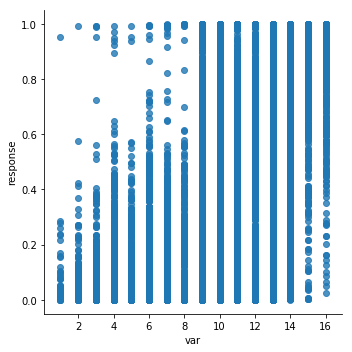

In [81]:
import seaborn as sns

sns.lmplot(x='var',y='response',data=var_data,fit_reg=False)

In [83]:
#LOWESS- Locally Weighted Scatterplot Smoothing
import statsmodels.api as sm
smooth_data=sm.nonparametric.lowess(var_data['response'],var_data['var'])
#                                         y                    x
# smooth_data

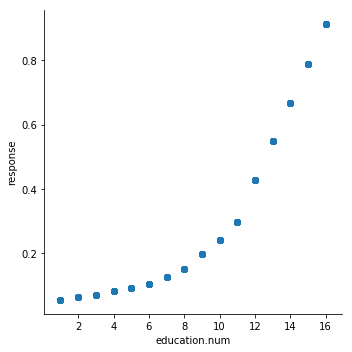

In [85]:
df=pd.DataFrame({'response':smooth_data[:,1],var_name:smooth_data[:,0]})

sns.lmplot(x=var_name,y='response',data=df,fit_reg=False)